In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Businesses 

In [11]:
# Loading data 
b_data = pd.read_json('business.json', lines=True)
b_sub = b_data.sample(frac=0.01)

In [4]:
#Filtering Data

# b_data = b_data[b_data.is_open == 1]
b_sub = b_sub[b_sub.is_open == 1]

In [153]:
labels = ['Restaurants', 'restaurants','Restaurant', 'restaurant','bar','Bar','bars','Bars',
          'Food','food','Foods','foods','Dinner','dinner','Breakfast','breakfast']
def is_restaurant(x): 
    for label in labels: 
        if label in x:
            return True
    return False 

In [13]:
# Extracting restaurants
b_filt = b_sub[b_sub.categories.apply(is_restaurant)]
b_filt

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
125869,33493 Lake Rd,"{'GoodForMeal': {'dessert': False, 'latenight'...",k9v5WACEP5Khmr0HEu-EIg,"[Bars, Mexican, Nightlife, Restaurants]",Avon Lake,"{'Monday': '11:00-22:00', 'Tuesday': '11:00-22...",0,41.503811,-82.052371,Los Amigos Mexican Bar & Grill,,44012,18,4.0,OH
78144,"8010 E McDowell Rd, Ste 101",{'BusinessAcceptsCreditCards': True},jwlYt1THl6Fllqn2qRcLeQ,"[Real Estate, Real Estate Services, Home Servi...",Scottsdale,"{'Friday': '9:30-16:00', 'Tuesday': '9:30-16:0...",1,33.466606,-111.908474,KRK Realty and Management,,85257,10,4.0,AZ
66287,"3046 Don Mills Road, Unit 20","{'GoodForMeal': {'dessert': False, 'latenight'...",aeEVWgcUf1-f46Dk-EzgTQ,"[Restaurants, Food, Chinese, Desserts]",Toronto,"{'Monday': '10:00-22:00', 'Tuesday': '10:00-22...",1,43.785831,-79.353279,Fresh Cup Bubble Tea,,M2J 5A7,4,4.5,ON
123714,216 N Craig St,"{'RestaurantsTableService': False, 'GoodForMea...",stD-LTFFwlmBdzU-0aBntw,"[Restaurants, Pizza, Italian]",Pittsburgh,"{'Monday': '11:00-0:00', 'Tuesday': '11:00-0:0...",1,40.450632,-79.951033,Little Nipper's Pizza II,Oakland,15213,36,3.5,PA
73850,2700 West North Lane,"{'Alcohol': 'full_bar', 'HasTV': True, 'NoiseL...",HTaA1mo9cB1dXMwfJC6yKg,"[Sports Bars, Restaurants, American (New), Nig...",Phoenix,"{'Monday': '11:00-1:00', 'Tuesday': '11:00-1:0...",1,33.580348,-112.118365,Buffalo Wild Wings,,85051,164,2.5,AZ
82192,2447 Park Rd,"{'BusinessParking': {'garage': False, 'street'...",zBxbRtUcAQvE7hGsam9Agg,"[Beer, Wine & Spirits, Food]",Charlotte,"{'Monday': '16:00-22:00', 'Tuesday': '16:00-22...",1,35.196869,-80.851176,Bulldog Beer And Wine - Dilworth,,28203,28,4.5,NC
22954,"Palms Casino Resort, 4321 West Flamingo Rd","{'GoodForMeal': {'dessert': False, 'latenight'...",ltl1WFdxYcyKOCnV6llQjw,"[Dim Sum, Chinese, Restaurants]",Las Vegas,{},0,36.114539,-115.195684,Cathay House,,89103,17,2.5,NV
8613,268 Sainte Catherine Street W,"{'RestaurantsTableService': False, 'GoodForMea...",gVMu_ToZCgRSzfBm_lsuRw,"[Fast Food, Hot Dogs, Poutineries, Restaurants]",Montreal,"{'Monday': '10:30-23:00', 'Tuesday': '10:30-23...",1,45.507065,-73.566233,Restaurant Lafleur,Ville-Marie,H2X 2A1,5,4.0,QC
91536,5032 N 7th St,"{'RestaurantsTableService': False, 'GoodForMea...",_ikylomPLdTgVtE0xWR_1Q,"[Breakfast & Brunch, Restaurants, Mexican]",Phoenix,"{'Monday': '0:00-0:00', 'Tuesday': '0:00-0:00'...",1,33.510249,-112.065293,Rolberto's,,85014,23,3.5,AZ
115447,19700 One Norman Dr,"{'Ambience': {'romantic': False, 'intimate': F...",CWtRRmZRgwu62g2QV0jCJQ,"[American (Traditional), Food, Steakhouses, Re...",Cornelius,"{'Tuesday': '17:30-21:00', 'Friday': '17:30-22...",1,35.480913,-80.882426,The Steak Valet by Choplins,,28031,4,5.0,NC


In [245]:
#Number of Restaurants in top 25 cities
a = sorted([(label, len(info)) for label, info in b_filt.groupby('city')],key=lambda x: x[1],reverse=True)

In [248]:
b_filt.groupby('city').groups

{'Ajax': Int64Index([139518, 54322], dtype='int64'),
 'Anjou': Int64Index([62917], dtype='int64'),
 'Anthem': Int64Index([112662], dtype='int64'),
 'Aurora': Int64Index([13820], dtype='int64'),
 'Avondale': Int64Index([43914], dtype='int64'),
 'Bedford': Int64Index([37084], dtype='int64'),
 'Bellevue': Int64Index([46456], dtype='int64'),
 'Bradford': Int64Index([15907], dtype='int64'),
 'Brampton': Int64Index([61799, 11609, 147147, 43356, 105753], dtype='int64'),
 'Brecksville': Int64Index([75594], dtype='int64'),
 'Bridgeville': Int64Index([84038], dtype='int64'),
 'Brook Park': Int64Index([154672], dtype='int64'),
 'Brunswick': Int64Index([3694], dtype='int64'),
 'Canonsburg': Int64Index([72123], dtype='int64'),
 'Carnegie': Int64Index([89983], dtype='int64'),
 'Chagrin Falls': Int64Index([84073], dtype='int64'),
 'Champaign': Int64Index([36730, 106781, 70185, 49494], dtype='int64'),
 'Chandler': Int64Index([141415, 40276, 106526, 89175, 59915, 14611, 115347, 119976], dtype='int64'),

In [246]:
pd.DataFrame(a,columns=['City','Count']).iloc[0:25]

,City,Count
0,Toronto,60
1,Las Vegas,49
2,Phoenix,36
3,Montréal,31
4,Charlotte,24
5,Cleveland,20
6,Pittsburgh,17
7,Mississauga,15
8,Edinburgh,14
9,Stuttgart,14


In [104]:
#Number of Restaurants by Rating 
pd.DataFrame(sorted([(label, len(info))for label, info in b_filt.groupby('stars')], reverse=True),columns=['Rating','Count'])

,Rating,Count
0,5.0,29
1,4.5,71
2,4.0,123
3,3.5,126
4,3.0,81
5,2.5,39
6,2.0,28
7,1.5,10
8,1.0,4


In [51]:
# Average Restaurant Rating 
b_filt.stars.sum()/b_filt.stars.size

3.547945205479452

In [887]:
b_filt.sort_values('stars',ascending=False).query('review_count > 10')[['name','stars']].head()

,name,stars
18664,Super Swirl Frozen Yogurt & Boba Teas,5.0
129289,CLE Juice Box,5.0
1743,Green Corner Restaurant,5.0
47884,Cafe Chocolade,5.0
77664,House of Barbers & Stylists,5.0


In [886]:
#Restaurants with top review counts
b_filt.sort_values('review_count',ascending=False,)[['name','review_count']].head()

,name,review_count
104769,Hash House A Go Go,4371
19669,The Buffet,3873
111074,Mesa Grill,2909
129600,Pho Kim Long,2445
107335,Hard Rock Hotel & Casino,1974


In [61]:
# Average Amount of Restaurant Reviews 
b_filt.review_count.sum()/b_filt.review_count.size

46.34637964774951

### Users 

In [19]:
u_data = pd.read_json('user.json', lines=True)
u_sub = u_data.sample(frac=0.0005)

In [28]:
u_sub.columns

Index(['average_stars', 'compliment_cool', 'compliment_cute',
       'compliment_funny', 'compliment_hot', 'compliment_list',
       'compliment_more', 'compliment_note', 'compliment_photos',
       'compliment_plain', 'compliment_profile', 'compliment_writer', 'cool',
       'elite', 'fans', 'friends', 'funny', 'name', 'review_count', 'useful',
       'user_id', 'yelping_since'],
      dtype='object')

In [64]:
#Average Stars by Users 
u_sub.average_stars.sum()/u_sub.average_stars.size

3.6956925675675674

In [65]:
#Average Review Count by Users 
u_sub.review_count.sum()/u_sub.review_count.size

21.89358108108108

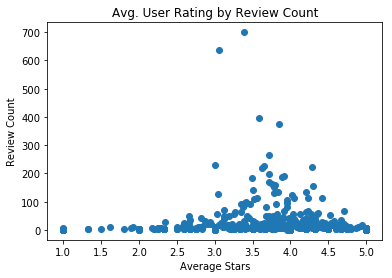

In [126]:
plt.scatter(u_sub.average_stars.values,u_sub.review_count.values)
plt.xlabel('Average Stars')
plt.ylabel('Review Count')
plt.title('Avg. User Rating by Review Count')
plt.show()

In [23]:
def get_age(x): 
    for year, month, day in (re.findall('(\d{4})-(\d{2})-(\d{2})', x)):
        days = (((2017 - int(year)) * 365) + (int(month) * 30) + int(day))
        return days


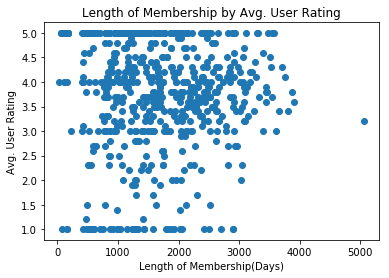

In [783]:
import re
a = u_sub.yelping_since.apply(get_age)
b = u_sub.average_stars.apply(lambda x: round(x,1))
plt.scatter(a,b)
plt.xlabel('Length of Membership(Days)')
plt.ylabel('Avg. User Rating')
plt.title('Length of Membership by Avg. User Rating')
plt.show()

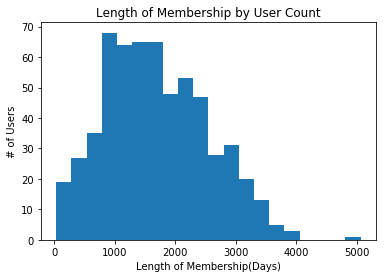

In [785]:
plt.hist(a,bins=20)
plt.xlabel('Length of Membership(Days)')
plt.ylabel('# of Users')
plt.title('Length of Membership by User Count')
plt.show()

In [205]:
(a.sum()/a.size)/365

4.727901703072936

In [206]:
a.max()

4385

### Reviews 

In [20]:
import json

with open('review.json') as json_file:      
    data = json_file.readlines()
    # this line below may take at least 8-10 minutes of processing for 4-5 million rows. It converts all strings in list to actual json objects. 
    data = list(map(json.loads, data)) 

r_data = pd.DataFrame(data)

In [33]:
r_sub = r_data.sample(frac=0.0001)

In [34]:
r_sub.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
3810472,6YM6QTJFHP5ae1ojZsTm8Q,0,2011-07-11,0,rG6bxTB3Sn67R8J9C6AykQ,3,I wish they had more items for women's wear bu...,0,7sNE58P4AvsX6QHE8ypCiA
952013,-BbnAc9YEO6pjvJGEtFbVQ,1,2016-12-07,0,lkrAA6PooCnso3u5brKXvQ,2,I do not get the hype at all. I moved to Toron...,1,pYLoML-PFPwEn9rhpw7Tnw
1805739,OwL4BM7GchsxBXxWrkmmqw,0,2011-11-12,0,ckULHF0Zl5f9Qw6G7isepA,5,"Back in home in Washington State, I always lov...",2,VsL7I-dRjo4eToDC7Un_3Q
4692565,xee3_yzH1YP5XycJiFQAZg,0,2016-09-14,0,ai5N9n58jXz-3uTxtvaLhw,5,"Great service from ""Smitty Movers. Co-owner an...",0,omclc0ZamHiu_TXpkk2oZQ
4125117,poYsvuOmVDqF4dTnjJ780A,0,2017-06-06,0,tvCbLS0MrG_-R2_iswZTWg,5,Awesome veggie burger\nAwesome waffle :)\nGrea...,0,pqtxka7mQr08Yz79XFIl8A


In [35]:
r_sub.columns

Index(['business_id', 'cool', 'date', 'funny', 'review_id', 'stars', 'text',
       'useful', 'user_id'],
      dtype='object')

### Tips

In [21]:
with open('tip.json') as json_file:      
    t_data = json_file.readlines()
    t_data = list(map(json.loads, t_data)) 

In [101]:
t_data = pd.DataFrame(t_data)
t_sub = t_data.sample(frac=0.001)

In [102]:
t_sub.head()

,business_id,date,likes,text,user_id
822368,l07ctcrDMV--TYwe3uzebQ,2017-05-02,0,Gets fairly busy after 4pm on weekdays,h69CQvbyAD7JVOc5VPz0_g
225652,bxRFIGAcYREvDBT3Nw3Vaw,2014-05-20,0,"Great happy hour, awesome food choices!",0-NHIj5lIBTa2mDwTqZz8Q
713917,2NiBvT5zL272IRcxru_x9A,2016-07-08,0,Honestly very nice people but food was not goo...,XQ3hBUKYoOpSVluros6UWg
494371,Mh84_j7YmRrAcm0DWV4bUw,2013-02-01,0,Really delicious. Really Italian. I keep think...,qiA5QI85-A2WB5lKRlyCIQ
480620,O7ot_LMlCfLpOP9tBqeNfw,2013-06-08,0,"Good food, love the boat~! Lolol.",4d7PvOD51AdvX4Wr1xB-5Q


### Data Manipulation

In [155]:
# Sampling of business data at 10% 
b_sub = b_data.sample(frac=0.1)
b_filt = b_sub[b_sub.categories.apply(is_restaurant)]
b_preds = b_filt[['attributes','business_id','city','review_count','stars']]

In [175]:
# Accquiring Attributes 
attributes = set()
for row in b_preds.iterrows():
    for key, value in row[1][0].items():
        attributes.add(key)

In [371]:
# Making of Categorical Columns 
for label in attributes:
    b_preds.loc[:,label] = True 

/Users/christopherrobinson/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/christopherrobinson/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [529]:
#Categorical Columns 
cat_cols = b_preds.columns[5:].values

In [423]:
for column in cat_cols: 
    for i in range(0,(b_filt.shape[0] - 1)):
        if column in b_preds.iloc[i].attributes.keys():
            if b_preds.iloc[i].attributes[column]:
                b_preds.loc[b_preds.iloc[[i]].index.values[0],column] = 1
            elif not b_preds.iloc[i].attributes[column]:
                b_preds.loc[b_preds.iloc[[i]].index.values[0],column] = 0
            else:
                b_preds.loc[b_preds.iloc[[i]].index.values[0],column] = [b_preds.iloc[i].attributes[column]]
        else:
            b_preds.loc[b_preds.iloc[[i]].index.values[0],column] = 0         

In [425]:
b_preds

,attributes,business_id,city,review_count,stars,BestNights,Ambience,HappyHour,RestaurantsReservations,GoodForMeal,...,AcceptsInsurance,HairSpecializesIn,GoodForDancing,RestaurantsDelivery,Smoking,Alcohol,BusinessAcceptsBitcoin,RestaurantsPriceRange2,Music,ByAppointmentOnly
22786,"{'Alcohol': 'none', 'Caters': False, 'WiFi': '...",0GVu1xLqxbUQLfSCp25OGQ,Chandler,76,4.0,0,0,0,0,0,...,0,0,0,1,0,1,0,1.0,0,False
7706,"{'GoodForMeal': {'dessert': False, 'latenight'...",VXgMXIFa90rwehlRYQdf5A,Mississauga,5,4.0,0,0,0,0,1,...,0,0,0,0,0,1,0,0.0,0,False
95462,"{'Alcohol': 'full_bar', 'HasTV': True, 'NoiseL...",ku6NGJSMJ5RwKnHrzVBQcA,Las Vegas,24,3.5,1,1,1,1,1,...,0,0,1,1,1,1,1,1.0,1,False
21608,"{'RestaurantsTableService': True, 'GoodForMeal...",bMOWg5Y6q9Cal6gWcoWEWw,Stuttgart,63,3.5,0,1,0,1,1,...,0,0,0,1,0,1,0,1.0,0,False
128227,"{'GoodForMeal': {'dessert': False, 'latenight'...",Y_UdgWtGdmetumEcS3C8bQ,Tempe,20,2.5,0,1,0,1,1,...,0,0,0,1,0,0,0,1.0,0,False
43720,"{'GoodForMeal': {'dessert': False, 'latenight'...",_7bPSTUk_FZvomYjawpdhA,Chandler,3,3.5,0,0,0,0,1,...,0,0,0,0,0,0,0,1.0,0,False
42228,"{'RestaurantsTableService': True, 'GoodForMeal...",eYgxhKL8dW4FdjOi7z6EQw,Kent,11,3.0,0,1,0,1,1,...,0,0,0,1,0,1,0,1.0,0,False
155017,"{'BusinessParking': {'garage': False, 'street'...",wyAJw8IUbreDz8RgKoUPjQ,Edinburgh,5,5.0,1,1,1,0,0,...,0,0,1,0,1,1,0,1.0,1,False
104597,"{'GoodForMeal': {'dessert': False, 'latenight'...",Es0JayHVN_XPn1q5yFtn6g,Pittsburgh,10,2.5,0,0,0,1,1,...,0,0,0,1,0,1,0,1.0,0,False
131921,"{'GoodForMeal': {'dessert': False, 'latenight'...",Lih3sCWBJRgrsERRO6--Yg,Phoenix,9,2.0,0,0,0,1,1,...,0,0,0,1,0,1,0,1.0,0,False


In [426]:
#Restaurant Sampling of data at 1%
r_sub = r_data.sample(frac=0.01)

In [447]:
r_sub.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
1497637,7QX12Z9aXvkowqmbJbjsTg,0,2013-04-12,0,2gnk9Sjqz87Zwjy_u5bmfA,4,The dentist and staff were great. They were ve...,2,_ByB3h8TVa3FmGs7WiII4Q
1433441,3yMmo1sERpks50quoaA8PQ,0,2017-05-21,0,byaYF6q2gi7JQPqovZbQCQ,5,"I mean, wow. This place is a little hidden gem...",0,5JuFdzDzQmv-TvNHWSOUSg
4090102,IZivKqtHyz4-ts8KsnvMrA,1,2015-02-10,2,HeH2Zpn__8SBDb-tL7QExg,5,MY NEW FAVORITE IS THE OREO MILK TEA WITH BLAC...,1,MiiDmAzwoI0k2X_yu2Coug
4686515,CPxUsIkhYDSHqgz6sNDmqw,0,2014-08-11,0,pZQ8YvClhUlRtIhOBHZfBQ,5,"Awesome massages here, and they have some of t...",0,kL6asbH7udn5TYtnGxYRCw
715910,XDiSzQa-3WVODgF23pFAFQ,2,2012-01-25,0,nX17WwmhklGij_pTR252KA,4,Why is the Barony so often empty? It's a great...,2,g74l-c4UXDKTwHuScrO3sg


### Modeling

In [456]:
#Filters out reviews of only restaurants from large review file 
r_df = r_sub[r_sub['business_id'].isin(b_preds.business_id.values)]
r_df = r_df[['business_id','stars','user_id']]

In [460]:
#Arranges matrix UserId X BusinessID w/ rating as values
R_df = r_df.pivot(index = 'user_id', columns = 'business_id', values = 'stars').fillna(0)

In [543]:
mean_user_ratings = np.mean(R_df.as_matrix(),axis=1).reshape(-1,1)

In [544]:
mean_rest_ratings = np.mean(R_df.as_matrix(),axis=0).reshape(-1,1)

In [465]:
#Normalized data by each user's mean and converted df to np.array
R_d = R_df.as_matrix() - mean_user_ratings

### Sample Average Baseline Recommender

In [667]:
temp_u = R_df[lambda x: x != 0].mean(axis=1)
mean_u = pd.DataFrame(temp_u) 

In [671]:
temp_r = R_df[lambda x: x != 0].mean(axis=0)
mean_r = pd.DataFrame(temp_r) 

In [679]:
def base_avg_rec(userID, businessID, u_df, r_df,):
    
    # Get the user's mean
    user_m = u_df.loc[userID].values[0]
    
    # Get the restaurants's mean
    rest_m = r_df.loc[businessID].values[0]
    
    #Get overall restaurant rating 
    star_m = b_preds.stars.mean()
    
    um = (user_m - u_df.mean())
    rm = (rest_m - r_df.mean())
    
    rating = star_m + um + rm 
    print ('User ID: {0} has an average rating of {1} stars and restaurant ID: {2} has an average rating of {3} stars.'.format(userID, user_m, businessID, rest_m))
    print ('User ID: {0} would rate restaurant ID: {1} {2} stars.'.format(userID, businessID, rating))

    return rating

rating = base_avg_rec('-7-p6z1GIHc7xlmgWTqxXg', '-FtngCwHCD2tRlH8jpj_Ag', mean_u, mean_r)

User ID: -7-p6z1GIHc7xlmgWTqxXg has an average rating of 4.0 stars and restaurant ID: -FtngCwHCD2tRlH8jpj_Ag has an average rating of 3.5 stars.
User ID: -7-p6z1GIHc7xlmgWTqxXg would rate restaurant ID: -FtngCwHCD2tRlH8jpj_Ag 0    3.679683
dtype: float64 stars.


### Surprise SVD 

In [1111]:
from surprise import Reader, Dataset, BaselineOnly, SVD, SVDpp, evaluate, accuracy, GridSearch, KNNBasic ,Prediction

In [ ]:
#Used Surprise Module Tutorial/Documentation in order to implement model 
#and below code. 

In [687]:
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(r_df[['user_id','business_id','stars']],reader)

In [737]:
raw_ratings = data.raw_ratings

In [741]:
#Splitting of data 
threshold = int(.9 * len(raw_ratings))
A_raw_ratings = raw_ratings[:threshold]
B_raw_ratings = raw_ratings[threshold:]

In [742]:
data.raw_ratings = A_raw_ratings
data.split(n_folds=5)

In [1109]:
param_grid = {'n_factors': [2,100,1000,2000],'n_epochs': [10, 20], 'lr_all': [0.002, 0.005],
              'reg_all': [0.02,0.4, 0.6]}

In [1110]:
grid_search = GridSearch(SVDpp, param_grid, measures=['RMSE'])
grid_search.evaluate(data)

[{'n_factors': 2, 'n_epochs': 10, 'lr_all': 0.002, 'reg_all': 0.02}, {'n_factors': 2, 'n_epochs': 10, 'lr_all': 0.002, 'reg_all': 0.4}, {'n_factors': 2, 'n_epochs': 10, 'lr_all': 0.002, 'reg_all': 0.6}, {'n_factors': 2, 'n_epochs': 10, 'lr_all': 0.005, 'reg_all': 0.02}, {'n_factors': 2, 'n_epochs': 10, 'lr_all': 0.005, 'reg_all': 0.4}, {'n_factors': 2, 'n_epochs': 10, 'lr_all': 0.005, 'reg_all': 0.6}, {'n_factors': 2, 'n_epochs': 20, 'lr_all': 0.002, 'reg_all': 0.02}, {'n_factors': 2, 'n_epochs': 20, 'lr_all': 0.002, 'reg_all': 0.4}, {'n_factors': 2, 'n_epochs': 20, 'lr_all': 0.002, 'reg_all': 0.6}, {'n_factors': 2, 'n_epochs': 20, 'lr_all': 0.005, 'reg_all': 0.02}, {'n_factors': 2, 'n_epochs': 20, 'lr_all': 0.005, 'reg_all': 0.4}, {'n_factors': 2, 'n_epochs': 20, 'lr_all': 0.005, 'reg_all': 0.6}, {'n_factors': 100, 'n_epochs': 10, 'lr_all': 0.002, 'reg_all': 0.02}, {'n_factors': 100, 'n_epochs': 10, 'lr_all': 0.002, 'reg_all': 0.4}, {'n_factors': 100, 'n_epochs': 10, 'lr_all': 0.002, 

------------
Mean RMSE: 1.3347
------------
------------
Parameters combination 31 of 48
params:  {'n_factors': 1000, 'n_epochs': 20, 'lr_all': 0.002, 'reg_all': 0.02}
------------
Mean RMSE: 1.3353
------------
------------
Parameters combination 32 of 48
params:  {'n_factors': 1000, 'n_epochs': 20, 'lr_all': 0.002, 'reg_all': 0.4}
------------
Mean RMSE: 1.3346
------------
------------
Parameters combination 33 of 48
params:  {'n_factors': 1000, 'n_epochs': 20, 'lr_all': 0.002, 'reg_all': 0.6}
------------
Mean RMSE: 1.3336
------------
------------
Parameters combination 34 of 48
params:  {'n_factors': 1000, 'n_epochs': 20, 'lr_all': 0.005, 'reg_all': 0.02}
------------
Mean RMSE: 1.3351
------------
------------
Parameters combination 35 of 48
params:  {'n_factors': 1000, 'n_epochs': 20, 'lr_all': 0.005, 'reg_all': 0.4}
------------
Mean RMSE: 1.3329
------------
------------
Parameters combination 36 of 48
params:  {'n_factors': 1000, 'n_epochs': 20, 'lr_all': 0.005, 'reg_all': 0

In [1104]:
print(grid_search.best_score['RMSE'])

1.32494131298


In [1105]:
print(grid_search.best_params['RMSE'])

{'n_factors': 1, 'n_epochs': 20, 'lr_all': 0.005, 'reg_all': 0.02}


In [1107]:
trainset = data.build_full_trainset()
algo = SVDpp(n_factors=1000, n_epochs=20, lr_all=0.005, reg_all=0.4 )
algo.train(trainset)

In [1093]:
algo.predict(userid,itemid)

Prediction(uid='-7-p6z1GIHc7xlmgWTqxXg', iid='H6TD-Kt1rYZBqzxSyidvFg', r_ui=None, est=3.8615918184914975, details={'was_impossible': False})

In [1094]:
predictions = algo.test(trainset.build_testset())
accuracy.rmse(predictions)

RMSE: 1.0931


1.0930923855457426

In [1095]:
testset = data.construct_testset(B_raw_ratings)  # testset is now the set B
predictions = algo.test(testset)
print('Unbiased accuracy on B,', end=' ')
accuracy.rmse(predictions)

Unbiased accuracy on B, RMSE: 1.3710


1.370998873350167

In [1096]:
userid = '-7-p6z1GIHc7xlmgWTqxXg'
itemid = 'H6TD-Kt1rYZBqzxSyidvFg'
actual_rating = 4
print(algo.predict(users[65], rests[999]))

user: IfsyEkWlg5KGmPi2Z1zx9Q item: K3iw26MkmSBPAM7BzHkIYQ r_ui = None   est = 3.75   {'was_impossible': False}


In [1097]:
users = list(set([a[0] for a in raw_ratings]))
rests = list(set([a[1] for a in raw_ratings]))

In [1098]:
from operator import itemgetter
def get_recs (user_id):
    recs = {}
    for rest in rests:
        recs[rest] = algo.predict(user_id, rest).est 
        
    items = sorted(recs.items(),key= lambda x: x[1] ,reverse=True)[0:9]
    toprecs = []
    for i,rec in list(enumerate(items)):
        if rec[0] in b_filt.business_id.values:
            toprecs.append((b_filt[b_filt.business_id==rec[0]].name.values[0],rec[1]))
    
    return toprecs

In [1099]:
get_recs(users[1])

[('Bobby Q', 4.2932406971718944),
 ("Grouchy John's Coffee", 4.2383586169826462),
 ("Defalco's Italian Grocery", 4.2188889933439828),
 ('The Bagel Cafe', 4.1851384587262137),
 ('Angry Crab & BBQ', 4.1243951195400657),
 ('Egg Works', 4.1104830450674097),
 ('Go!ku', 4.1020270891095771),
 ('Harumi Sushi', 4.1000531954832473),
 ('Cibo', 4.0975679041466915)]

In [1100]:
get_recs(users[534])

[('Bobby Q', 4.4513270128771971),
 ("Grouchy John's Coffee", 4.3853656505077572),
 ("Defalco's Italian Grocery", 4.3699596440922379),
 ('The Bagel Cafe', 4.3211092440157559),
 ('Egg Works', 4.2865432978655846),
 ('Harumi Sushi', 4.2778996286775453),
 ('Angry Crab & BBQ', 4.2728917405580873),
 ('Cibo', 4.2648489343126927),
 ('Go!ku', 4.2536949204259615)]

In [1101]:
get_recs(users[166])

[('Bobby Q', 4.3611024057629315),
 ("Defalco's Italian Grocery", 4.3096997703809024),
 ("Grouchy John's Coffee", 4.2879012553675588),
 ('Egg Works', 4.2176578271359588),
 ('The Bagel Cafe', 4.1954934609489243),
 ('Angry Crab & BBQ', 4.1950380105076279),
 ('PHO 43', 4.180205810402577),
 ('Harumi Sushi', 4.1767547973045973),
 ('Cibo', 4.1582889612655807)]

### KNN Model (for Comparison to SVD) 

In [1116]:
knn = KNNBasic()
knn.train(trainset)

Computing the msd similarity matrix...
Done computing similarity matrix.


In [1118]:
train_predictions = knn.test(trainset.build_testset())
accuracy.rmse(train_predictions)

RMSE: 0.3170


0.31702938086605731

In [1120]:
test_predictions = knn.test(testset)
accuracy.rmse(test_predictions)

RMSE: 1.4061


1.4060608406406079